# Outline
fix this index for convenience

1. [data and package import](#Data-and-package-import)
1. [basic cleaning](#Second-Heading)
1. [case 1 clening and result](#)
1. case 1 clening and result
1. case 2 cleaning and result
1. case 3 cleaning and result

at this point, this file will not include models

how to deal with updating codes?

# Basic cleaning

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("train.csv")

## Grouping all data by country latest only
This data will be saved as TotalNumberbyCountryLatest.csv

In [2]:
df_totalnum = df.drop(['Id','Province_State'], axis = 1, inplace = True)
df_totalnum = df.query('Date == "2020-03-31"')
df_totalnum.rename(columns={'ConfirmedCases':'AccumulatedCases'}, inplace = True)

/home/lyllme/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [3]:
grouped = df_totalnum.groupby('Country_Region')

df_groupedcs = grouped.sum()

In [4]:
#execute only when you update csv
#df_groupedcs.to_csv('/home/lyllme/Covid19/TotalNumberbyCountryLatest.csv')

dftotal = pd.read_csv('TotalNumberbyCountryLatest.csv')
dftotal

Country_Region  AccumulatedCases  Fatalities
0      Afghanistan             174.0         4.0
1          Albania             243.0        15.0
2          Algeria             716.0        44.0
3          Andorra             376.0        12.0
4           Angola               7.0         2.0
..             ...               ...         ...
168     Uzbekistan             172.0         2.0
169      Venezuela             135.0         3.0
170        Vietnam             212.0         0.0
171         Zambia              35.0         0.0
172       Zimbabwe               8.0         1.0

[173 rows x 3 columns]

## Getting locational data 
This will be saved as CountryLocation.csv

In [5]:
#!conda install -c conda-forge geocoder -y

In [6]:
import geocoder

l_lat = []
l_long = []
l_place = []

for place in dftotal.Country_Region:
    ret = geocoder.osm(place, timeout=120.0)
    print(place, ret.latlng)
    l_place.append(place)
    l_lat.append(ret.latlng[0])
    l_long.append(ret.latlng[1])

Afghanistan [33.7680065, 66.2385139]
Albania [41.000028, 19.9999619]
Algeria [28.0000272, 2.9999825]


KeyboardInterrupt: 

In [ ]:
lplace = pd.DataFrame(l_place)
llat = pd.DataFrame(l_lat)
llong = pd.DataFrame(l_long)

dfloc = dfloc.assign(Cs = lplace)
dfloc = dfloc.assign(Lattitude = llat, Longtitude = llong)

dfloc.rename(columns={'Unnamed: 0':'Id'}, inplace = True)
dfloc.rename(columns={'0':'Country_Region'}, inplace = True)
dfloc.drop(['Cs'], axis = 1, inplace = True)

# to save this file
#dfloc.to_csv('/home/lyllme/Covid19/CountryLocation.csv')

In [ ]:
#df_groupedcs.to_csv('/home/lyllme/Covid19/TotalNumberbyCountryLatest.csv')

dfgeo = pd.read_csv('CountryLocation.csv')
dfgeo

# Case # mortality rate

## Importing package and data

In [ ]:
#!conda install -c conda-forge folium -y

In [ ]:
import pandas as pd
import numpy as np
import os
import folium
df = pd.read_csv("train.csv")
dftotal = pd.read_csv('TotalNumberbyCountryLatest.csv')
dfloc = pd.read_csv('CountryLocation.csv')

In [ ]:
# download countries geojson file
#!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
#print('GeoJSON file downloaded!')

## Result

wondering why am i using geojson although i collected data from geocoder

In [ ]:
dftotal = pd.read_csv('TotalNumberbyCountryLatest.csv')

dftotal.rename(columns={'Country_Region':'Country'}, inplace = True)
dftotal = dftotal.assign(Total = dftotal.Fatalities/dftotal.AccumulatedCases)

df_can = dftotal

world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
# generate choropleth map using the total number of AccumulatedCases and Fatalities
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Death Rate of Covid19 as of March 31st'
)

# display map
world_map.save('/home/lyllme/Covid19/MortalityRate.html')

world_map

# Case #:  Heat map of Accumulated Cases as of March 31

## Importing package and data

In [7]:
dfloc = pd.read_csv('CountryLocation.csv')
dfloc.rename(columns={'Unnamed: 0':'Id'}, inplace = True)
dftotal = pd.read_csv('TotalNumberbyCountryLatest.csv')

dfheat = dftotal
dfheat = dfheat.assign(Lattitude = dfloc.Lattitude, Longtitude = dfloc.Longtitude)
dfheat['ID'] = dfheat.index
#dfheat[dfheat['Country_Region'].isin(['China'])]

dfheatdata = dfheat.drop(columns=['Country_Region', 'Fatalities', 'ID', 'AccumulatedCases'])
dfheatdata = dfheatdata.assign(AccumulatedCases=dfheat.AccumulatedCases)
heatdata = dfheatdata.values.tolist()
#print(heatdata)

## Result

In [8]:
import os
import folium

print(folium.__version__)

import numpy as np

from folium.plugins import HeatMap

#decide the center
m = folium.Map([48., 5.], tiles='stamentoner', zoom_start=1)

HeatMap(heatdata).add_to(m)
m.save('/home/lyllme/Covid19/Heatmap.html')


m

0.5.0


# Case #: 10 Severest Countries in Total Fatalities 

## Importing package and data

In [9]:
import pandas as pd
import numpy as np
import os
import folium

dftotal = pd.read_csv('TotalNumberbyCountryLatest.csv')
dftotal = dftotal.nlargest(10, 'Fatalities')

range(1,15)
l_dftotal = dftotal.values.tolist()

## Result

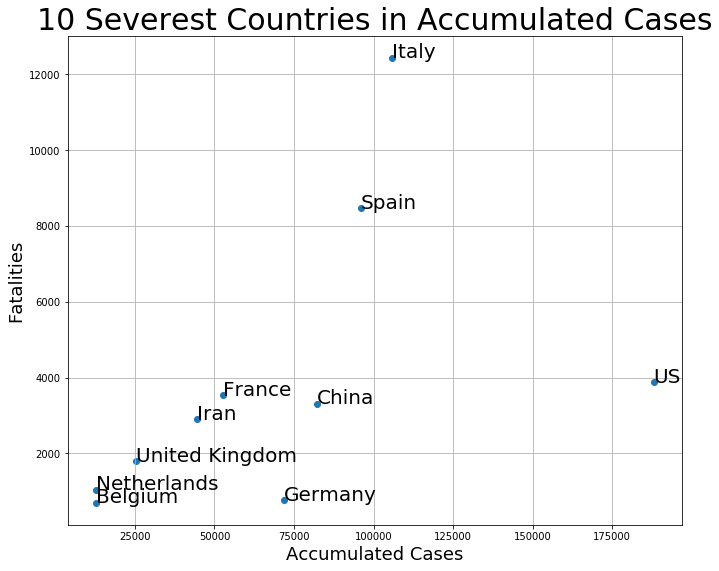

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize
figsize(11, 9)

plt.xlabel("Accumulated Cases", size= 18)
plt.ylabel("Fatalities", size = 18)
plt.title("10 Severest Countries in Accumulated Cases", size = 30)

together = dftotal.values.tolist()



for x,y,z in l_dftotal:
       plt.annotate(str(x), xy=(y, z), size=20)

plt.grid(True)
# 散布図を描画

x = dftotal.AccumulatedCases
y = dftotal.Fatalities

plt.scatter(x, y)

plt.savefig('10SeverestCountries.png') # 画像の保存

# Case #: Timeseries Changes in Italy and US

## Importing package and dataset

### Italy

In [61]:
dfitaly = pd.read_csv('train.csv').query('Country_Region == "Italy"').drop(['Province_State','Country_Region', 'Id'], axis = 1)
dfitaly = dfitaly.rename(columns={'ConfirmedCases': 'ConfirmedCases_Italy'})
dfitaly = dfitaly.rename(columns={'Fatalities': 'Fatalities_Italy'})
dfitaly = dfitaly[39:69]
time = dfitaly.Date
list = []
for i in time:
    list.append(i[8:].replace('-', '/'))

dfitaly['date'] = list
dfitaly.drop('Date', axis = 1, inplace = True)



### US

In [62]:
dfus = pd.read_csv('train.csv').query('Country_Region == "US"').groupby('Date').sum().drop('Id', axis = 1)
dfus = dfus.rename(columns={'ConfirmedCases': 'ConfirmedCases_US'})
dfus = dfus.rename(columns={'Fatalities': 'Fatalities_US'})
dfus['Date'] = dfus.index
dfus.drop('Date', axis = 1)
dfus = dfus[39:69]
time = dfus.Date
list = []
for i in time:
    list.append(i[8:].replace('-', '/'))

dfus['date'] = list
dfus.drop('Date', axis = 1, inplace = True)

### Japan

In [63]:
dfjapan = pd.read_csv('train.csv').query('Country_Region == "Japan"').groupby('Date').sum().drop('Id', axis = 1)
dfjapan = dfjapan.rename(columns={'ConfirmedCases': 'ConfirmedCases_Japan'})
dfjapan = dfjapan.rename(columns={'Fatalities': 'Fatalities_Japan'})
dfjapan['Date'] = dfjapan.index
dfjapan.drop('Date', axis = 1)
dfjapan = dfjapan[39:69]
time = dfjapan.Date
list = []
for i in time:
    list.append(i[8:].replace('-', '/'))

dfjapan['date'] = list
dfjapan.drop('Date', axis = 1, inplace = True)

### Korea

In [64]:
dfkorea = pd.read_csv('train.csv').query('Country_Region == "Korea"').groupby('Date').sum().drop('Id', axis = 1)
dfkorea = dfkorea.rename(columns={'ConfirmedCases': 'ConfirmedCases_Korea'})
dfkorea = dfkorea.rename(columns={'Fatalities': 'Fatalities_Korea'})
dfkorea['Date'] = dfkorea.index
dfkorea.drop('Date', axis = 1)
dfkorea = dfkorea[39:69]
time = dfkorea.Date
list = []
for i in time:
    list.append(i[8:].replace('-', '/'))

dfkorea['date'] = list
dfkorea.drop('Date', axis = 1, inplace = True)

In [65]:
dftwo = pd.merge(dfus, dfitaly, on='date', how='inner')

In [66]:
dfasia = pd.merge(dfjapan, dfkorea, on='date', how='inner')

## Result

wondering if I should
- include Japan
- divide cases and fatalities

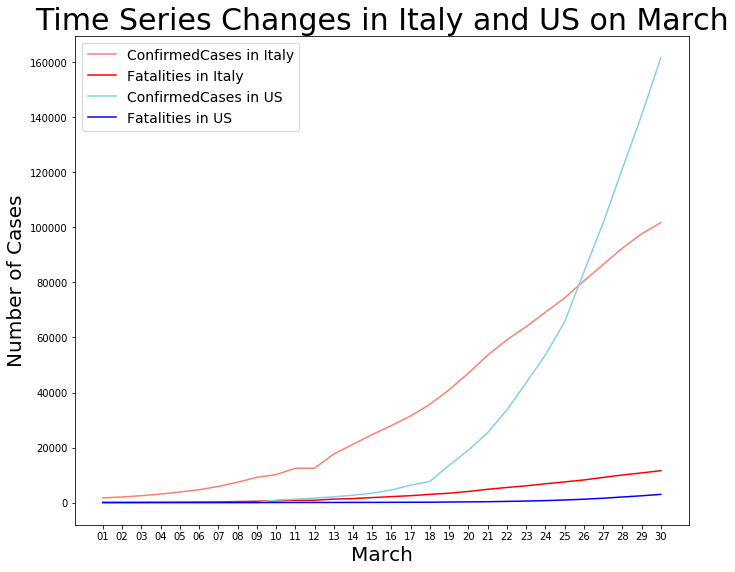

In [67]:
##### import numpy as np
import matplotlib.pyplot as plt
figsize(11, 9)
fig, ax = plt.subplots()
#fig = plt.figure(figsize=(10.0, .0))
#ax = fig.add_subplot(111)
#plt.show()

t = dftwo.date
y1 = dftwo.ConfirmedCases_Italy
y2 = dftwo.Fatalities_Italy
y3 = dftwo.ConfirmedCases_US
y4 = dftwo.Fatalities_US

c1,c2, c3, c4 = "salmon","red", "skyblue", "blue"  # 各プロットの色
l1,l2, l3, l4 = "ConfirmedCases in Italy","Fatalities in Italy", "ConfirmedCases in US","Fatalities in US"  # 各ラベル

ax.set_xlabel('March', size = 20)  # x軸ラベル
ax.set_ylabel('Number of Cases', size = 20)  # y軸ラベル
ax.set_title(r'Time Series Changes in Italy and US on March', size = 30) # グラフタイトル

ax.plot(t, y1, color=c1, label=l1)
ax.plot(t, y2, color=c2, label=l2)
ax.plot(t, y3, color=c3, label=l3)
ax.plot(t, y4, color=c4, label=l4)

ax.legend(loc=0, fontsize=14)    # 凡例
plt.savefig('Italyetc.png') # 画像の保存
plt.show()

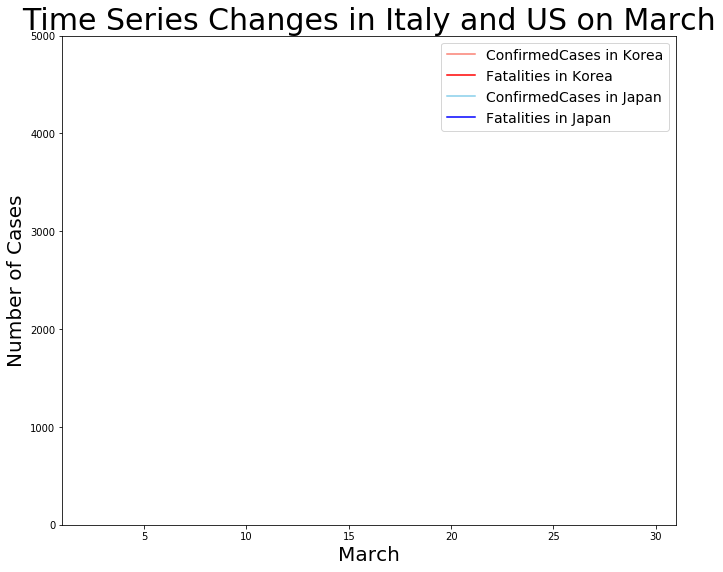

In [68]:
##### import numpy as np
import matplotlib.pyplot as plt
figsize(11, 9)
fig, ax = plt.subplots()
#fig = plt.figure(figsize=(10.0, .0))
#ax = fig.add_subplot(111)
#plt.show()

t = dfasia.date
y5 = dfasia.ConfirmedCases_Korea
y6 = dfasia.Fatalities_Korea
y7 = dfasia.ConfirmedCases_Japan
y8 = dfasia.Fatalities_Japan

plt.xlim(1,31)
plt.ylim(0,5000)

c5,c6, c7, c8= "salmon","red", "skyblue", "blue"  # 各プロットの色
l5,l6, l7, l8 = "ConfirmedCases in Korea","Fatalities in Korea", "ConfirmedCases in Japan","Fatalities in Japan"  # 各ラベル

ax.set_xlabel('March', size = 20)  # x軸ラベル
ax.set_ylabel('Number of Cases', size = 20)  # y軸ラベル
ax.set_title(r'Time Series Changes in Italy and US on March', size = 30) # グラフタイトル

ax.plot(t, y5, color=c5, label=l5)
ax.plot(t, y6, color=c6, label=l6)
ax.plot(t, y7, color=c7, label=l7)
ax.plot(t, y8, color=c8, label=l8)

ax.legend(loc=0, fontsize=14)    # 凡例
plt.savefig('Asia.png') # 画像の保存
plt.show()

# Case # Accumulated Cases as of March 31st

## Importing package and data

In [69]:
import pandas as pd
import numpy as np
import os
import folium

dftotal = pd.read_csv('TotalNumberbyCountryLatest.csv')
dftotal = dftotal.nlargest(10, 'Fatalities')

range(1,15)
l_dftotal = dftotal.values.tolist()
dftotal

Country_Region  AccumulatedCases  Fatalities
81            Italy          105792.0     12428.0
147           Spain           95923.0      8464.0
162              US          188018.0      3870.0
58           France           52827.0      3532.0
33            China           82279.0      3309.0
77             Iran           44605.0      2898.0
166  United Kingdom           25471.0      1793.0
114     Netherlands           12667.0      1040.0
62          Germany           71808.0       775.0
16          Belgium           12775.0       705.0

## Result

In [70]:
import pandas as pd
import numpy as np
import os
import folium
df = pd.read_csv("train.csv")
dftotal = pd.read_csv('TotalNumberbyCountryLatest.csv')
dfloc = pd.read_csv('CountryLocation.csv')

In [26]:
dftotal = pd.read_csv('TotalNumberbyCountryLatest.csv')

dftotal.rename(columns={'Country_Region':'Country'}, inplace = True)
dftotal = dftotal.assign(Total = dftotal.AccumulatedCases)

df_can = dftotal
df_can

Country  AccumulatedCases  Fatalities  Total
0    Afghanistan             174.0         4.0  174.0
1        Albania             243.0        15.0  243.0
2        Algeria             716.0        44.0  716.0
3        Andorra             376.0        12.0  376.0
4         Angola               7.0         2.0    7.0
..           ...               ...         ...    ...
168   Uzbekistan             172.0         2.0  172.0
169    Venezuela             135.0         3.0  135.0
170      Vietnam             212.0         0.0  212.0
171       Zambia              35.0         0.0   35.0
172     Zimbabwe               8.0         1.0    8.0

[173 rows x 4 columns]

In [27]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
# generate choropleth map using the total number of AccumulatedCases and Fatalities
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Confirmed cases of Covid19 as of March 31st'
)

# display map
world_map.save('/home/lyllme/Covid19/ConfirmedCases.html')

world_map

# end